TASK 4

Sales prediction involves forecasting the amount of a product thatcustomers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.


In [1]:
# 1. IMPORT LIBRARIES 
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2.LOADING DATASET 
data = pd.read_csv("C:\\Users\\User\\Documents\\CODSOFT\\TASK4 - sales dataset\\advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
# 3.exploring data
# displaying the first 10 rows of data
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [4]:
# displaying the last 10 rows of data
data.tail(10)   

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,11.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
# dimension of the dataset
data.shape

(200, 4)

In [8]:
#summary statistics 
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
#checking for missing values 
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

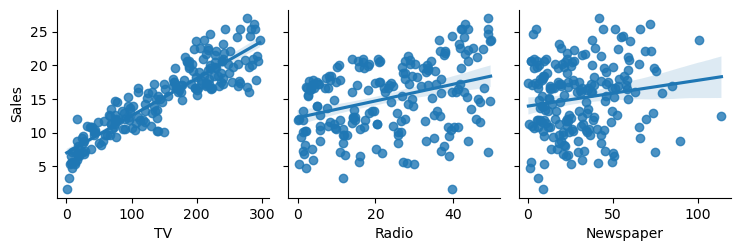

In [10]:
# 4. DATA VISUALIZATION 
 # Scatter plots to check the linearity
    # assume independent variable (TV, Radio, Newspaper) and the dependent variable (Sales)

sns.pairplot(data, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

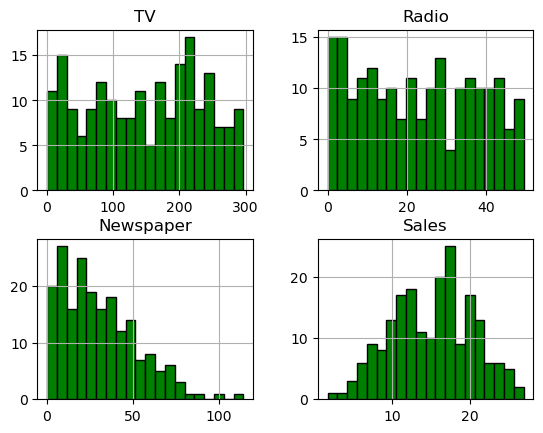

In [11]:
# Histograms to check the normality 

data.hist(bins=20,color='green', edgecolor='black')

In [12]:
# 5. splitting the dataset
# split the data into features (X) and target variables (Y)
X = data[['TV', 'Radio','Newspaper']]
Y = data['Sales']

# split the data into train and test sets
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [13]:
# 6.MODEL BUILDING 
#create a linear regression model and fit it to training data
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [14]:
# 7. making prediction 
y_pred = model.predict(x_test)

In [15]:
#8. Evaluating the model
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred, squared=False))

Mean Absolute Error: 1.274826210954934
Mean Squared Error: 2.907756910271091
Root Mean Squared Error: 1.7052146229349228


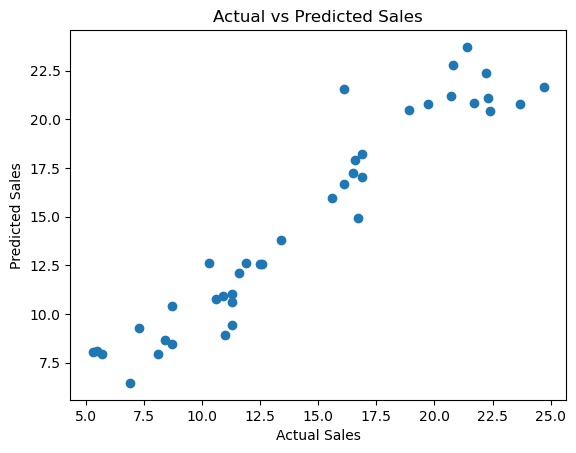

In [16]:
# 9. visualizing the prediction 
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

Text(0.5, 1.0, 'Distribution of Sales')

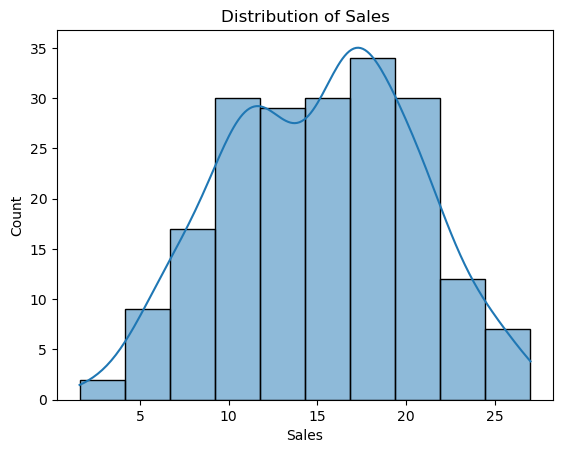

In [17]:
sns.histplot(data['Sales'],kde=True)
plt.title('Distribution of Sales')